In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2023-09-24 23:19:37.864673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('vgsales.csv')
sales_threshold = data['Global_Sales'].median()
data['Success'] = data['Global_Sales'] > sales_threshold
data = data.drop(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales'], axis=1)


In [3]:
X = data.drop('Success', axis=1)
y = data['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM

In [4]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.99
Testing Accuracy: 0.99


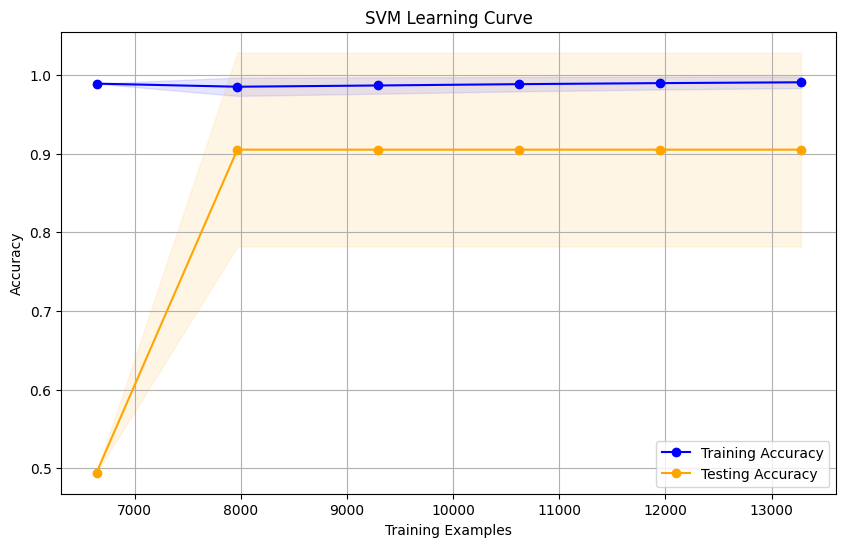

In [5]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("SVM Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Testing Accuracy")
plt.legend(loc="best")
plt.show()


# KNN

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 0.99


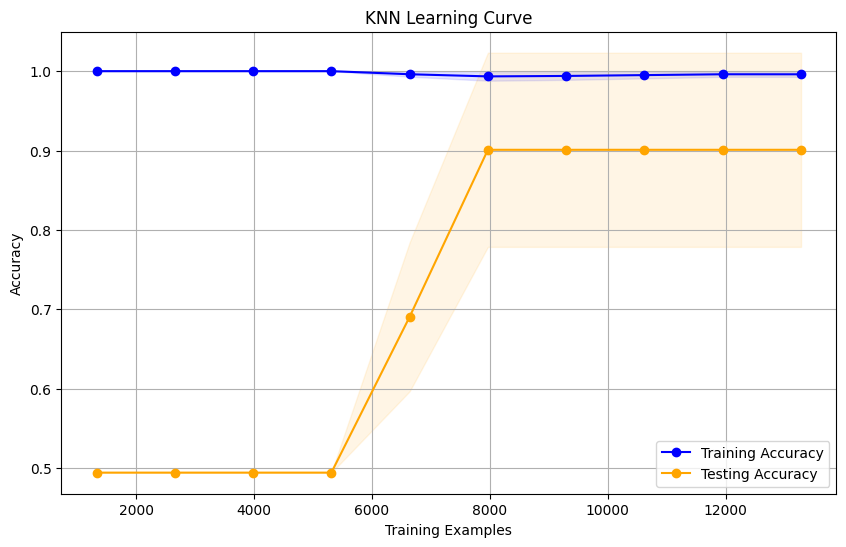

In [7]:
train_sizes, train_scores, test_scores = learning_curve(knn_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("KNN Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Testing Accuracy")
plt.legend(loc="best")
plt.show()


# Boosting

In [8]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

y_train_pred = adaboost_classifier.predict(X_train)
y_test_pred = adaboost_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.99
Testing Accuracy: 0.99


In [9]:
feature_importances = adaboost_classifier.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
NA_Sales: 0.3000
EU_Sales: 0.3000
JP_Sales: 0.2600
Other_Sales: 0.1400


# DecisionTree

In [10]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_classifier.fit(X_train, y_train)

y_train_pred = decision_tree_classifier.predict(X_train)
y_test_pred = decision_tree_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.98
Testing Accuracy: 0.98


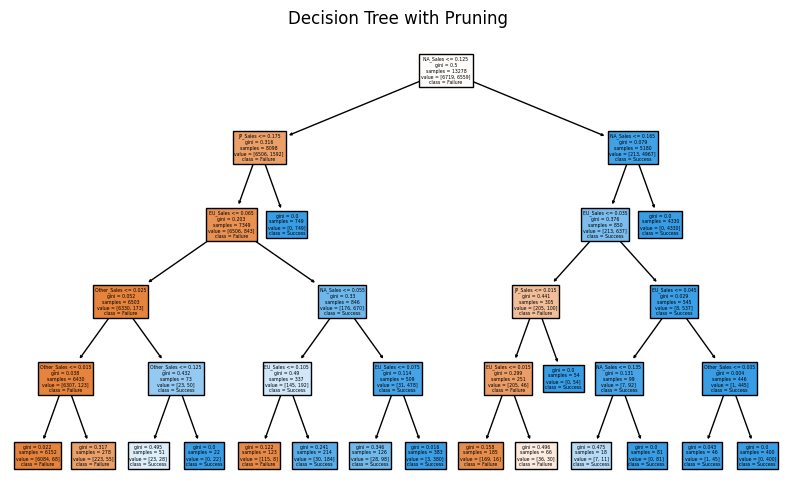

In [11]:
plt.figure(figsize=(10, 6))
plot_tree(decision_tree_classifier, feature_names=X.columns, class_names=['Failure', 'Success'], filled=True)
plt.title("Decision Tree with Pruning")
plt.show()


# Neural Network

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Epoch 1/10
166/166 - 1s - loss: 0.4565 - accuracy: 0.9088 - val_loss: 0.2243 - val_accuracy: 0.9590 - 930ms/epoch - 6ms/step
Epoch 2/10
166/166 - 0s - loss: 0.1306 - accuracy: 0.9722 - val_loss: 0.0815 - val_accuracy: 0.9940 - 225ms/epoch - 1ms/step
Epoch 3/10
166/166 - 0s - loss: 0.0628 - accuracy: 0.9889 - val_loss: 0.0503 - val_accuracy: 0.9974 - 266ms/epoch - 2ms/step
Epoch 4/10
166/166 - 0s - loss: 0.0440 - accuracy: 0.9923 - val_loss: 0.0385 - val_accuracy: 0.9974 - 193ms/epoch - 1ms/step
Epoch 5/10
166/166 - 0s - loss: 0.0351 - accuracy: 0.9937 - val_loss: 0.0313 - val_accuracy: 0.9974 - 203ms/epoch - 1ms/step
Epoch 6/10
166/166 - 0s - loss: 0.0298 - accuracy: 0.9951 - val_loss: 0.0271 - val_accuracy: 0.9974 - 185ms/epoch - 1ms/step
Epoch 7/10
166/166 - 0s - loss: 0.0260 - accuracy: 0.9949 - val_loss: 0.0237 - val_accuracy: 0.9970 - 187ms/epoch - 1ms/step
Epoch 8/10
166/166 - 0s - loss: 0.0233 - accuracy: 0.9954 - val_loss: 0.0221 - val_accuracy: 0.9970 - 196ms/epoch - 1ms/step


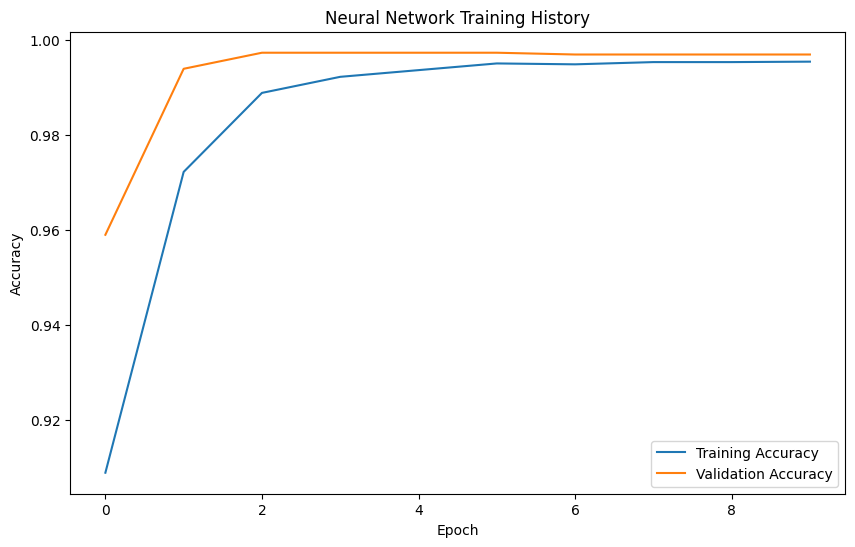

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network Training History')
plt.legend(loc='lower right')
plt.show()